# Plant Classification Model

## Import Module
Disini pembuatan modelnya menggunakan Keras

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as K
import matplotlib.pyplot as plt

## Mount Google Drive
Pastikan Link: https://drive.google.com/drive/folders/1cD5paKyz6F3C0W8JPUeH-NTPCaKm1PZm

dibuat shortcutnya ke folder KSC di drive masing-masing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Reading Dataset as ImageFolder
Membaca masing-masing dataset yang displit menjadi 80% Training, 20% Validasi

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory as imageFolder

In [ ]:
path = "/content/drive/MyDrive/Tutorial/Tubes/Dataset"
train = imageFolder(path, subset="training",validation_split=0.2, seed = 123, image_size=(256, 256))
val = imageFolder(path, subset="validation",validation_split=0.2, seed = 123, image_size=(256, 256))

Found 8301 files belonging to 3 classes.
Using 6641 files for training.
Found 8301 files belonging to 3 classes.
Using 1660 files for validation.


In [ ]:
class_names = train.class_names
class_names

['Kamboja', 'Kentang', 'Tomat']

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in train.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

Output hidden; open in https://colab.research.google.com to view.

## Transfer Learning using EfficientNetV2L

In [ ]:
input_t = K.Input(shape=(256, 256, 3))
pretrained_model = K.applications.EfficientNetV2L(include_top = False, weights = "imagenet", input_tensor = input_t)

Beberapa Layer terakhir dari EfficientNetV2L diupdate (sisanya difreeze parameternya)

Proses ini disebut juga dengan fine-tuning

In [ ]:
len(pretrained_model.layers)

1028

In [ ]:
for layer in pretrained_model.layers[:1000]:
  layer.trainable = False

Menambahkan layer fully connected sendiri untuk klasifikasi

In [ ]:
model = K.models.Sequential()
#Transfer Learning
model.add(pretrained_model)
#Fully Connected Layer
model.add(K.layers.Flatten())
model.add(K.layers.BatchNormalization())
model.add(K.layers.Dropout(0.2))
model.add(K.layers.Dense(128, activation='relu'))
model.add(K.layers.BatchNormalization())
model.add(K.layers.Dense(3, activation='softmax'))

## Training Model
Digunakan loss function Sparse Categorical Cross Entropy dari Keras dengan Optimizer SGD (learning rate = 0.0005)

In [ ]:
opt = K.optimizers.SGD(learning_rate=0.0005)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=['accuracy'])

history = model.fit(train, epochs=20, validation_data=val)

Epoch 1/20
208/208 [==============================] - 259s 782ms/step - loss: 0.2920 - accuracy: 0.8987 - val_loss: 0.1328 - val_accuracy: 0.9608
Epoch 2/20
208/208 [==============================] - 155s 743ms/step - loss: 0.1226 - accuracy: 0.9636 - val_loss: 0.0912 - val_accuracy: 0.9723
Epoch 3/20
208/208 [==============================] - 138s 660ms/step - loss: 0.0897 - accuracy: 0.9733 - val_loss: 0.0822 - val_accuracy: 0.9759
Epoch 4/20
208/208 [==============================] - 136s 653ms/step - loss: 0.0670 - accuracy: 0.9818 - val_loss: 0.0635 - val_accuracy: 0.9837
Epoch 5/20
208/208 [==============================] - 137s 656ms/step - loss: 0.0565 - accuracy: 0.9828 - val_loss: 0.0587 - val_accuracy: 0.9843
Epoch 6/20
208/208 [==============================] - 154s 741ms/step - loss: 0.0558 - accuracy: 0.9854 - val_loss: 0.0540 - val_accuracy: 0.9861
Epoch 7/20
208/208 [==============================] - 137s 657ms/step - loss: 0.0450 - accuracy: 0.9884 - val_loss: 0.0520 -

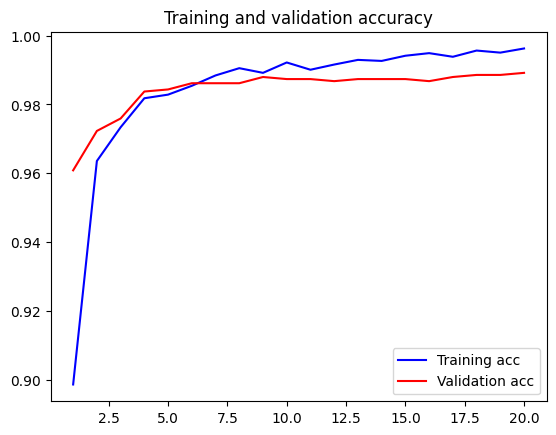

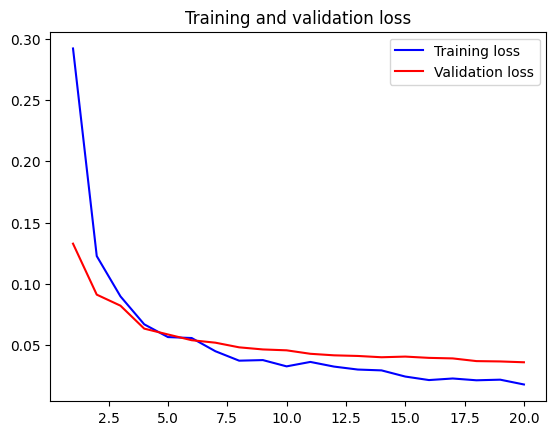

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Validasi Data

In [ ]:
for image_batch, labels_batch in val:
  print(image_batch.shape)
  print(labels_batch.shape)
  break
prediction = model.predict(image_batch)

(32, 256, 256, 3)
(32,)
1/1 [==============================] - 6s 6s/step


In [ ]:
plt.figure(figsize=(15, 15))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].numpy().astype("uint8"))
  plt.title("Prediksi Model:{0}\nLabel Sebenarnya:{1}".format(class_names[np.argmax(prediction[i])],class_names[labels_batch[i]]), fontsize = 8)
  plt.axis("off")

Output hidden; open in https://colab.research.google.com to view.

## Save Model

In [ ]:
model.save("/content/drive/MyDrive/Tutorial/Tubes/Classification_Model.keras")

## Testing with image from google

In [ ]:
loaded_model = tf.keras.models.load_model("/content/drive/MyDrive/Tutorial/Tubes/Classification_Model.keras")

In [ ]:
import numpy as np
image = tf.keras.utils.load_img("/content/Kambojas.jpg", target_size=(256,256)) # Kamboja
input_arr = tf.keras.utils.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
np.shape(input_arr)

(1, 256, 256, 3)

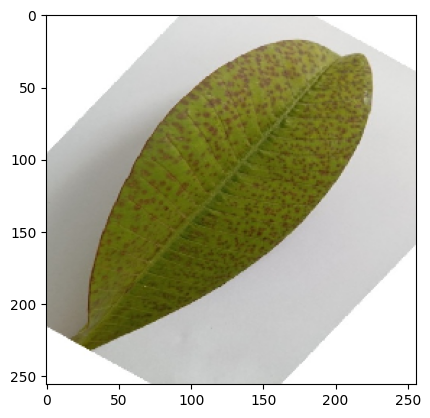

In [ ]:
plt.imshow(image)

In [ ]:
prediksi = loaded_model.predict(input_arr)

1/1 [==============================] - 8s 8s/step


In [ ]:
prediksi

array([[0.9974566 , 0.01332478, 0.27245834]], dtype=float32)

In [ ]:
print("Prediksi:", class_names[np.argmax(prediksi)])

Prediksi: Kamboja
